In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import miceforest as mf
import random
import sklearn.neighbors._base 
from xgbimputer import XGBImputer

In [13]:
df_ori = pd.read_csv("../datasets/train.csv")

In [2]:
df2 =  pd.read_csv('mapped_data.csv')
df2

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0,1.0,60.0,1.0
1,0,1,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1,3.0,70.0,1.0
2,0,1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,3,0.0,75.0,1.0
3,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,NaN,1.0,0.0,1.0,0,0.0,85.0,1.0
4,0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0,65.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,33,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,NaN,0.0,0.0,0.0,0,2.0,9.0,1.0
35969,33,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,12.0,1.0
35970,33,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0,0.0,48.0,1.0
35971,33,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,39.0,1.0


In [3]:
# label drop
target = 'DC201'

df2 = df2.dropna(subset=target)

In [4]:
df2_missing_data = pd.DataFrame(df2.isna().sum().loc[df2.isna().sum() > 0], columns=['missing_data_count'])
df2_missing_data['missing_data_type'] = df2.dtypes
df2_missing_data['missing_data_percentage'] = df2_missing_data['missing_data_count'] / len(df2)
df2_missing_data = df2_missing_data.sort_values(by='missing_data_percentage', ascending=False)
df2_missing_data

,missing_data_count,missing_data_type,missing_data_percentage
DC235,10444,float64,0.290353
DC242,5374,float64,0.149402
DC232,3024,float64,0.084070
DC232b,3024,float64,0.084070
DC230b,3009,float64,0.083653
DC241,612,float64,0.017014
DC213,77,float64,0.002141
DC142a,52,float64,0.001446
DC207,43,float64,0.001195
DC210,41,float64,0.001140


In [5]:
NUMERICAL_DATA = ['DC216', 'DC220', 'DC142a']
CATEGORICAL_DATA = [column for column in df2.columns if column != target and column not in NUMERICAL_DATA]

COLUMN_CATEGORICAL_INDEX = []

for column in CATEGORICAL_DATA:
    COLUMN_CATEGORICAL_INDEX.append(df2.columns.get_loc(column))

In [6]:
# imputer = XGBImputer(categorical_features_index=COLUMN_CATEGORICAL_INDEX, replace_categorical_values_back=True)
# completed_dataset_xgb = imputer.fit_transform(df2)

In [7]:
# df3 = df2.copy()

# r1 = random.sample(range(len(df2)),36)
# r2 = random.sample(range(len(df2)),34)
# r3 = random.sample(range(len(df2)),37)
# r4 = random.sample(range(len(df2)),30)

# nan_columns = []

# for column in nan_columns:
#     df3['AveRooms'] = [val if i not in r1 else np.nan for i, val in enumerate(df3['AveRooms'])]

# # df2['AveRooms'] = [val if i not in r1 else np.nan for i, val in enumerate(df2['AveRooms'])]
# # df2['HouseAge'] = [val if i not in r2 else np.nan for i, val in enumerate(df2['HouseAge'])]
# # df2['MedHouseVal'] = [val if i not in r3 else np.nan for i, val in enumerate(df2['MedHouseVal'])]
# # df2['Latitude'] =    [val if i not in r4 else np.nan for i, val in enumerate(df2['Latitude'])]

In [8]:
# Create kernels.  # Mice Forest
kernel = mf.ImputationKernel(
  data=df2,
  save_all_iterations=True,
  random_state=1343
)
# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3,verbose=True)
#print(kernel)
completed_dataset_mf = kernel.complete_data(dataset=0, inplace=False)

Initialized logger with name mice 1-3
Dataset 0
1  | DC244 | DC220 | DC226 | DC246 | DC214 | DC109 | DC205 | DC230a | DC208 | DC215 | DC252 | DC209 | DC237 | DC206 | DC212 | DC211 | DC237a | DC237f | DC237e | DC237b | DC237c | DC237d | DC216 | DC210 | DC207 | DC142a | DC213 | DC241 | DC230b | DC232 | DC232b | DC242 | DC235
2  | DC244 | DC220 | DC226 | DC246 | DC214 | DC109 | DC205 | DC230a | DC208 | DC215 | DC252 | DC209 | DC237 | DC206 | DC212 | DC211 | DC237a | DC237f | DC237e | DC237b | DC237c | DC237d | DC216 | DC210 | DC207 | DC142a | DC213 | DC241 | DC230b | DC232 | DC232b | DC242 | DC235
3  | DC244 | DC220 | DC226 | DC246 | DC214 | DC109 | DC205 | DC230a | DC208 | DC215 | DC252 | DC209 | DC237 | DC206 | DC212 | DC211 | DC237a | DC237f | DC237e | DC237b | DC237c | DC237d | DC216 | DC210 | DC207 | DC142a | DC213 | DC241 | DC230b | DC232 | DC232b | DC242 | DC235


In [9]:
# pd.DataFrame(completed_dataset_xgb).head(15)

In [10]:
pd.DataFrame(completed_dataset_mf).head(15)

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0,1.0,60.0,1.0
1,0,1,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1,3.0,70.0,1.0
2,0,1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,3,0.0,75.0,1.0
3,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0,0.0,85.0,1.0
4,0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0,65.0,1.0
5,0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,0,1.0,12.0,1.0
6,0,1,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1,3.0,60.0,0.0
7,0,1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,4,0.0,96.0,1.0
8,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,12.0,1.0
9,0,1,3.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2,6.0,40.0,1.0


In [29]:
print("original")

for column in CATEGORICAL_DATA:
    print(column)
    print(df_ori[column].value_counts())
    print()

original
DC024
DC024
32    3513
35    3015
33    2701
53    1856
12    1743
11    1609
81    1290
73    1279
31    1262
52    1122
76    1071
64    1067
36    1043
74     945
18     879
72     841
16     833
21     822
13     810
82     763
51     719
61     674
63     648
14     648
17     580
19     531
34     517
15     492
94     472
75     465
62     463
71     453
65     431
91     413
Name: count, dtype: int64

DC025
DC025
1    19116
2    16854
Name: count, dtype: int64

DC205
DC205
12.0    25223
31.0     3576
17.0     3066
16.0     2815
21.0     1262
96.0       18
Name: count, dtype: int64

DC206
DC206
1.0    34514
0.0     1435
Name: count, dtype: int64

DC207
DC207
0.0    29128
1.0     6799
Name: count, dtype: int64

DC208
DC208
1.0    30450
0.0     5507
Name: count, dtype: int64

DC209
DC209
1.0    20473
0.0    15479
Name: count, dtype: int64

DC210
DC210
0.0    24192
1.0    11737
Name: count, dtype: int64

DC211
DC211
1.0    27266
0.0     8680
Name: count, dtype: int64

DC21

In [30]:
print('imputated')

for column in CATEGORICAL_DATA:
    print(column)
    print(completed_dataset_mf[column].value_counts())
    print()

imputated
DC024
DC024
11    3513
14    3015
12    2701
18    1856
1     1743
0     1609
30    1290
26    1279
10    1262
17    1122
29    1071
22    1067
15    1043
27     945
7      879
25     841
5      833
9      822
2      810
31     763
16     719
19     674
21     648
3      648
6      580
8      531
13     517
4      492
33     472
28     465
20     463
24     453
23     431
32     413
Name: count, dtype: int64

DC025
DC025
0    19116
1    16854
Name: count, dtype: int64

DC205
DC205
0.0    25230
4.0     3578
2.0     3066
1.0     2815
3.0     1263
5.0       18
Name: count, dtype: int64

DC206
DC206
1.0    34531
0.0     1439
Name: count, dtype: int64

DC207
DC207
0.0    29161
1.0     6809
Name: count, dtype: int64

DC208
DC208
1.0    30461
0.0     5509
Name: count, dtype: int64

DC209
DC209
1.0    20478
0.0    15492
Name: count, dtype: int64

DC210
DC210
0.0    24222
1.0    11748
Name: count, dtype: int64

DC211
DC211
1.0    27283
0.0     8687
Name: count, dtype: int64

DC212
DC2

In [27]:
print(len(completed_dataset_mf))

df_ori = df_ori.dropna(subset=target)

print(len(df_ori))

35970
35970


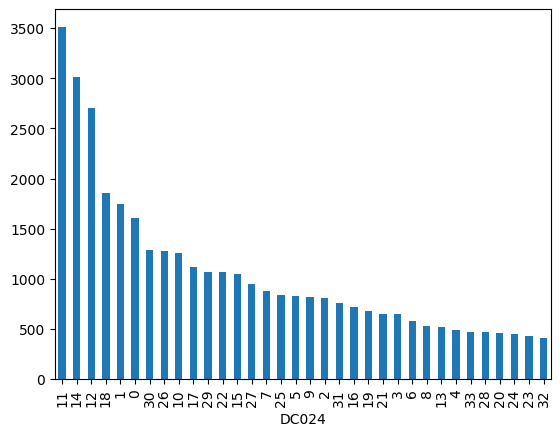

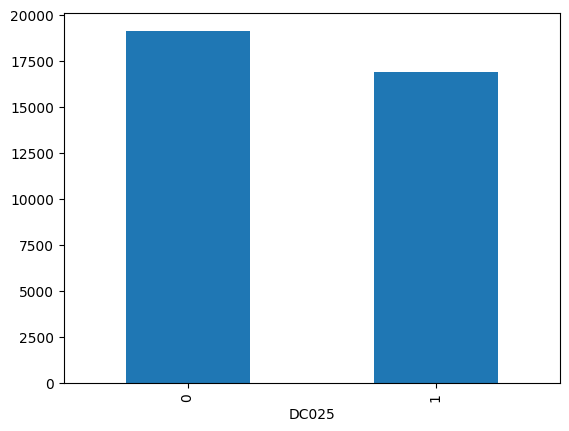

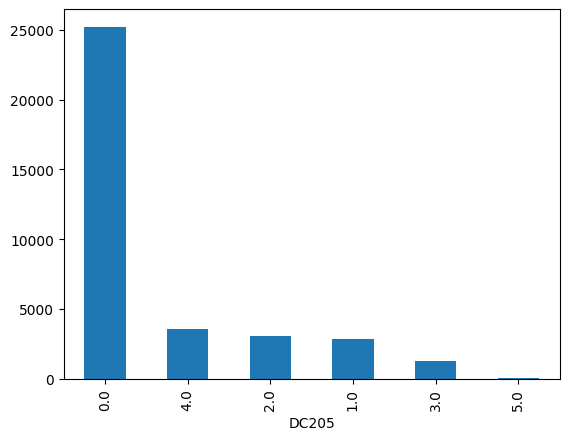

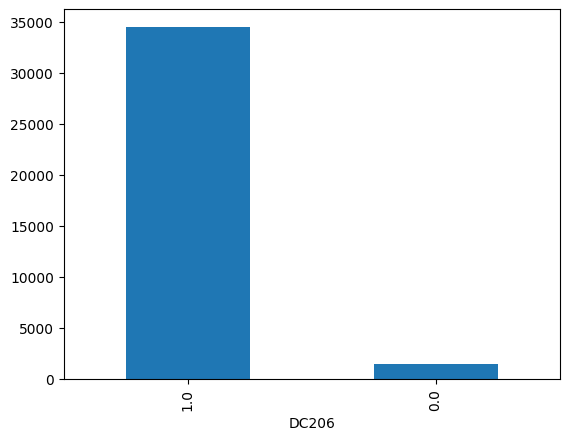

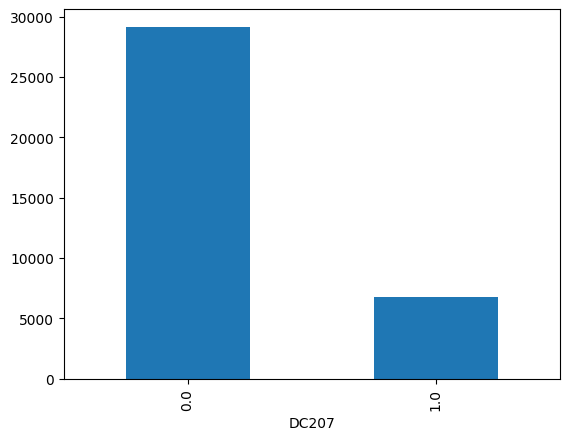

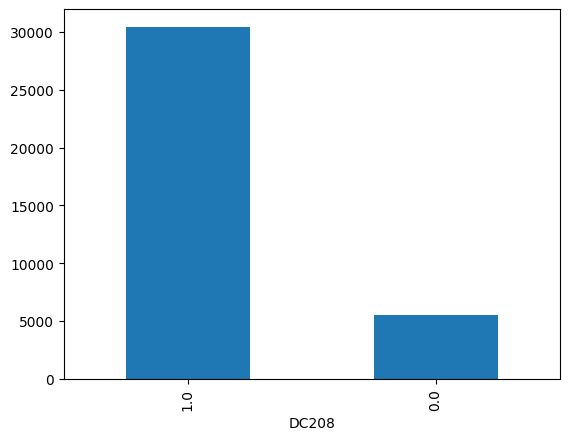

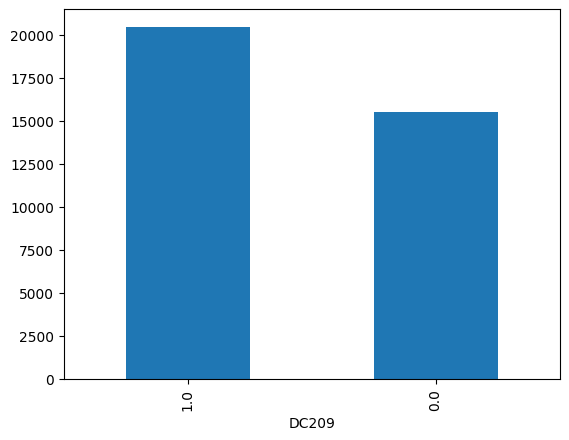

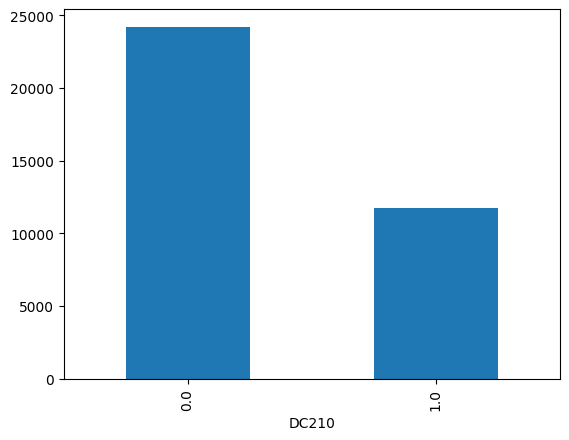

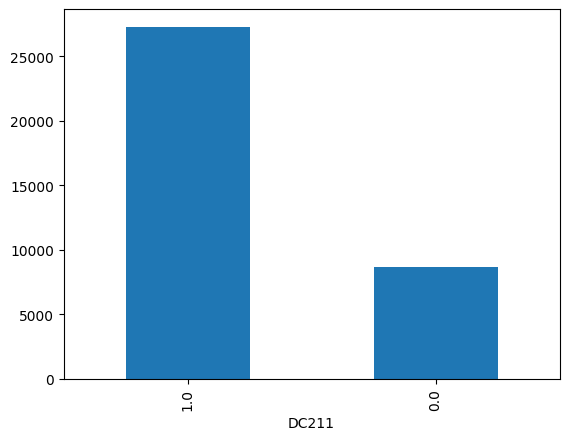

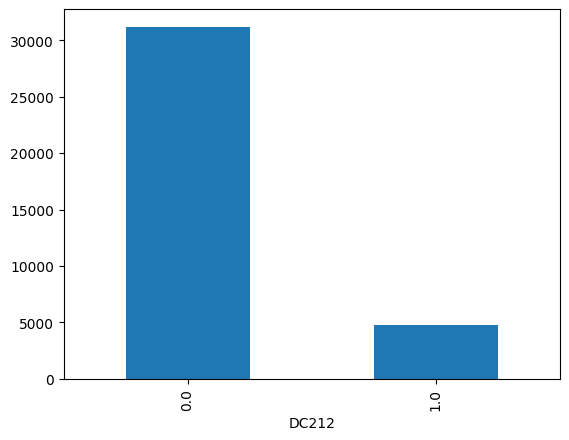

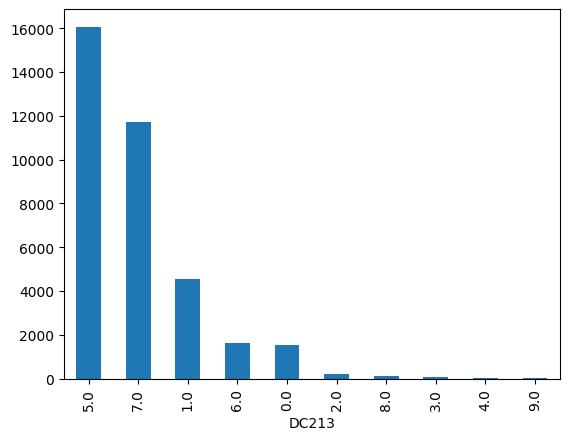

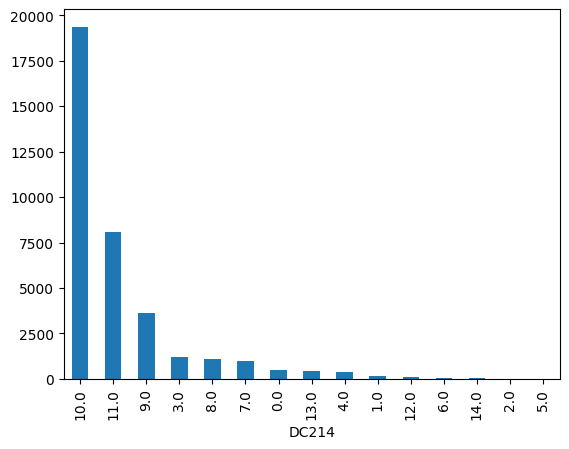

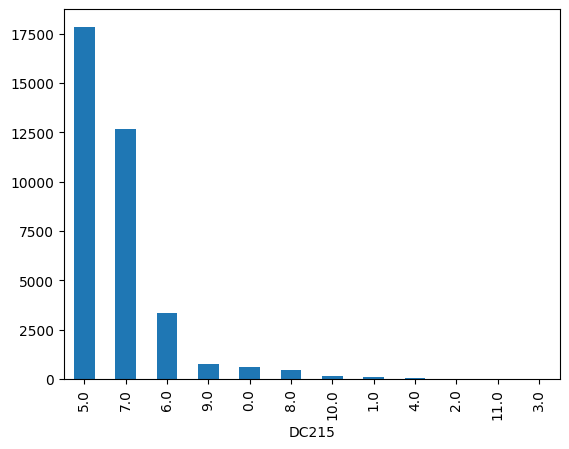

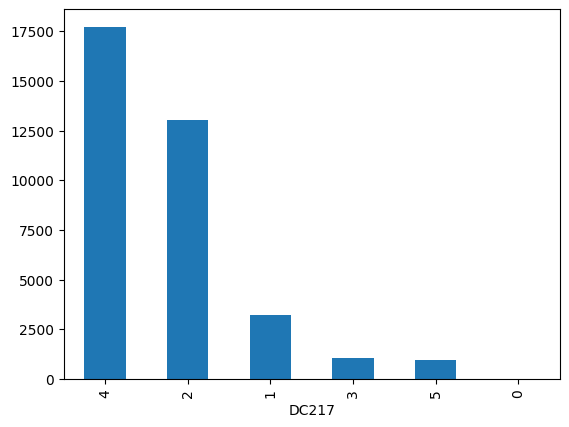

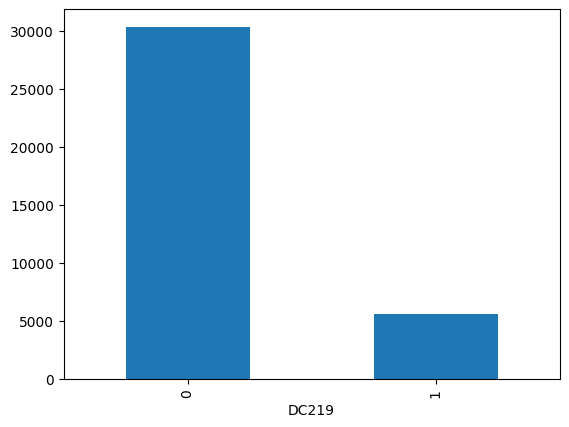

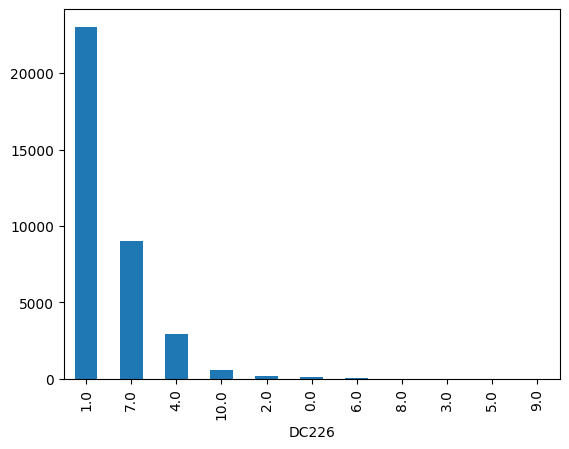

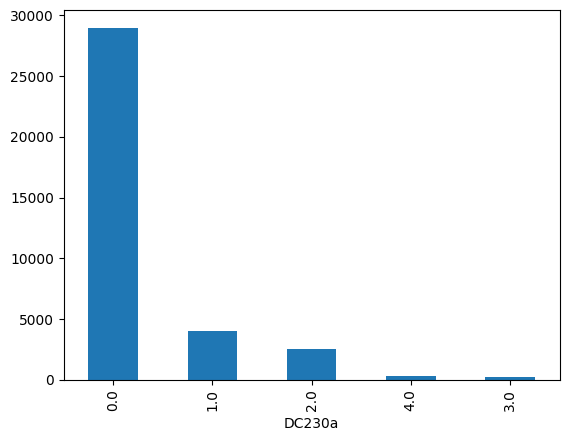

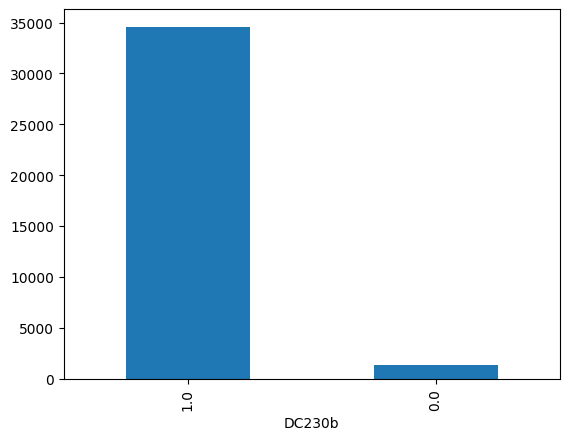

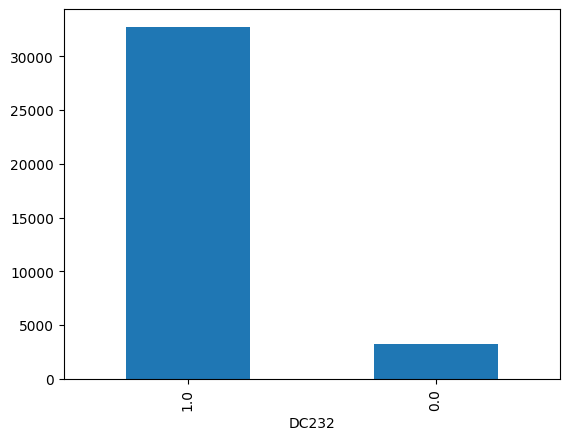

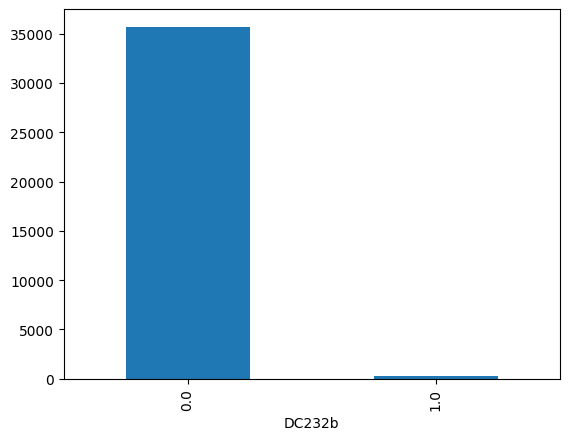

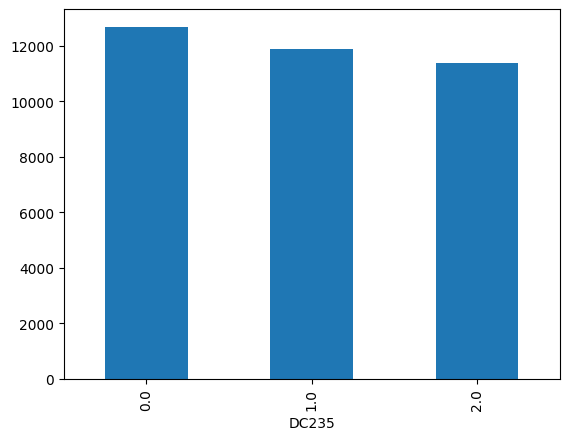

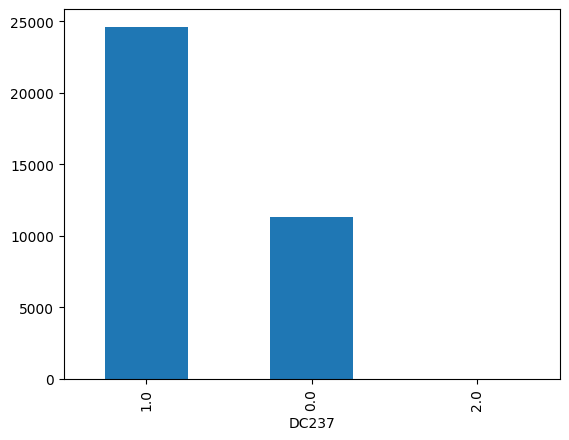

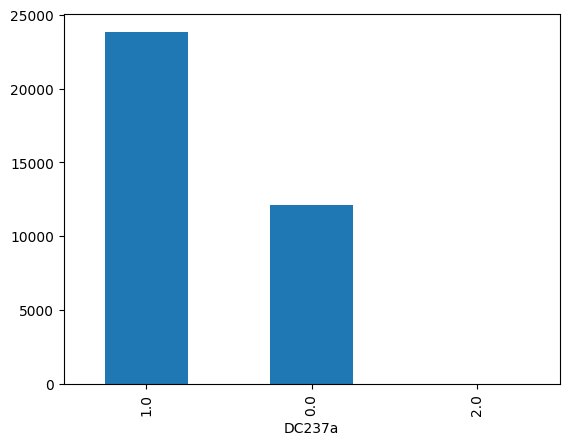

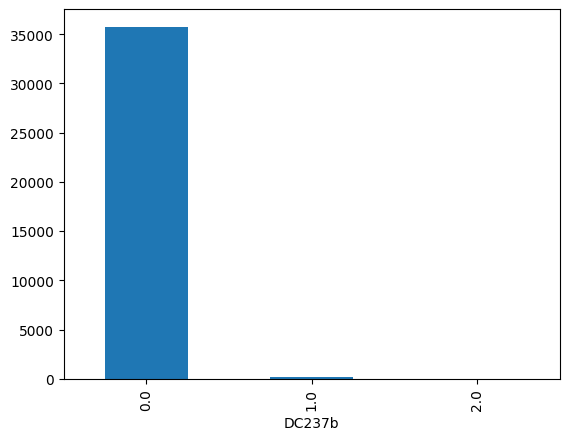

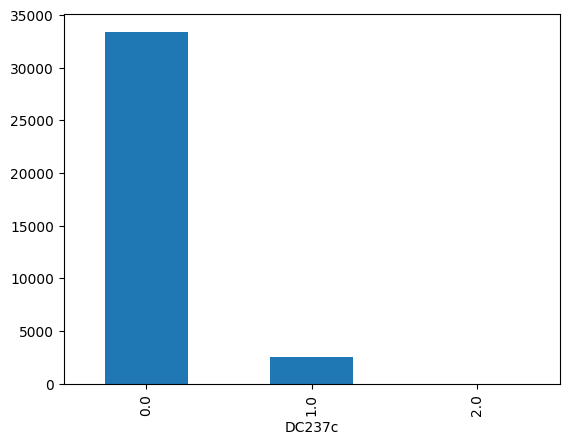

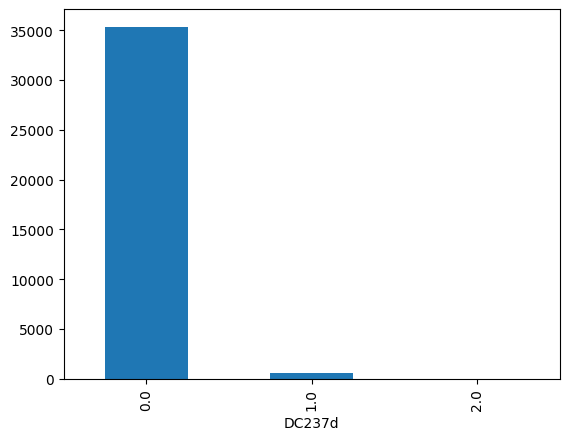

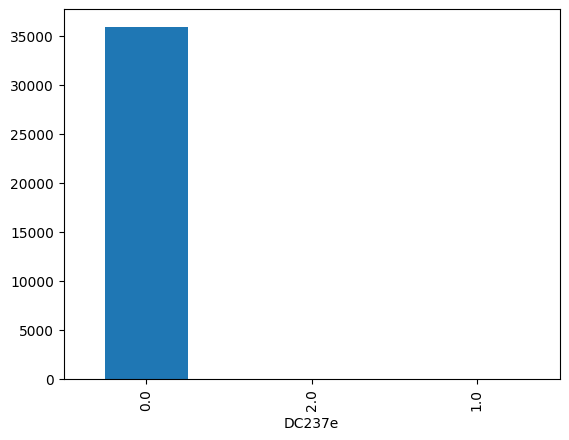

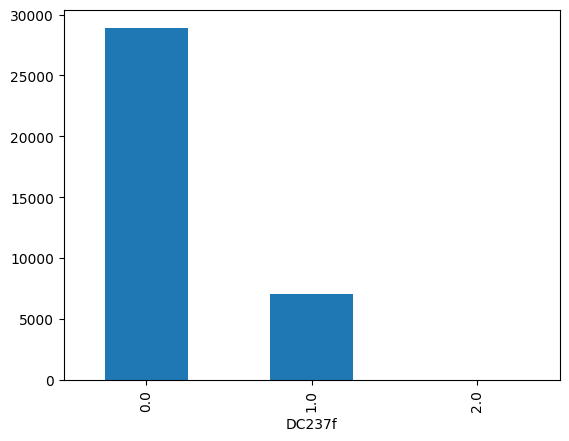

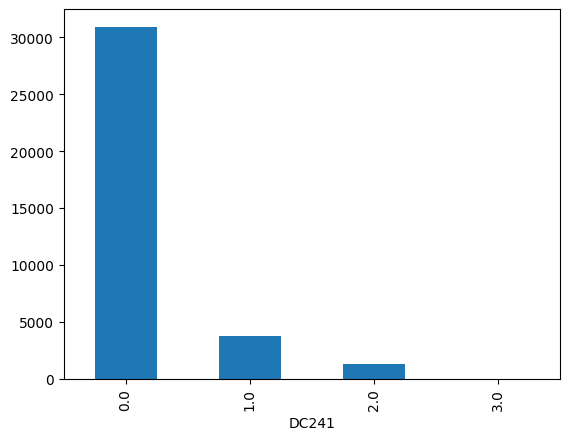

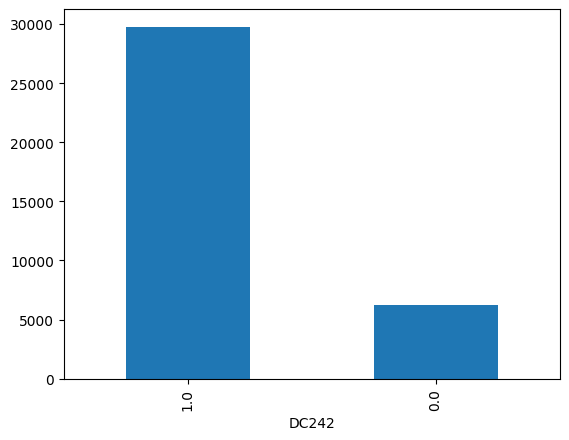

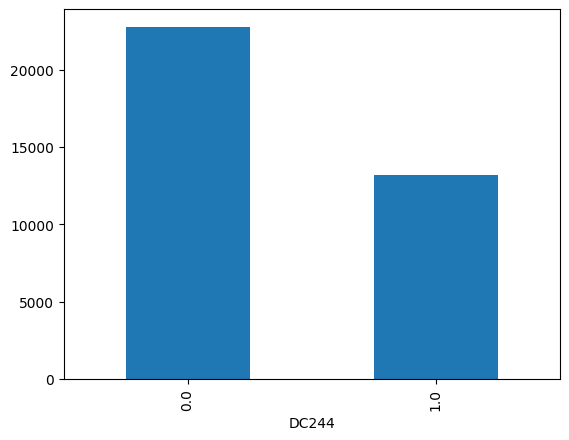

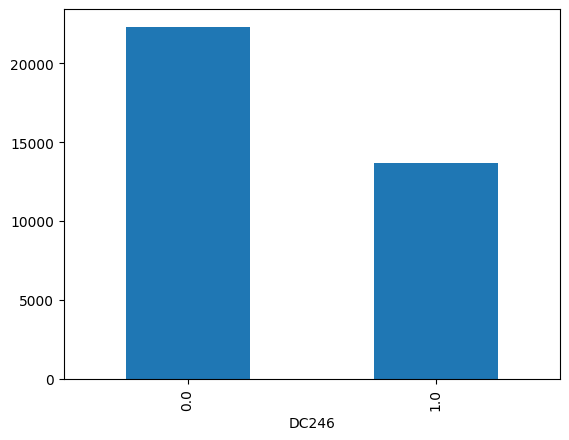

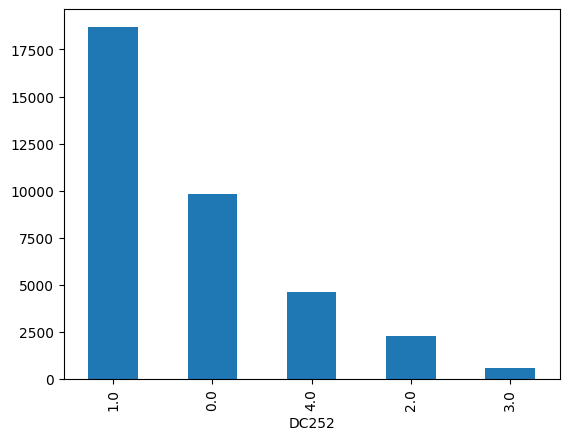

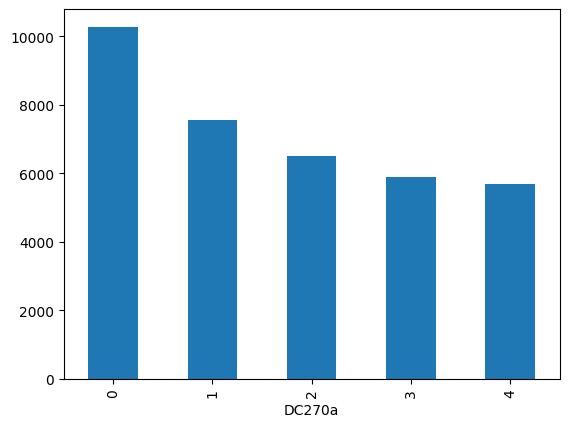

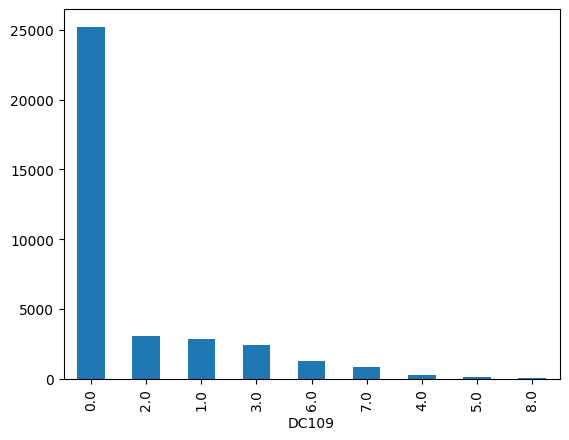

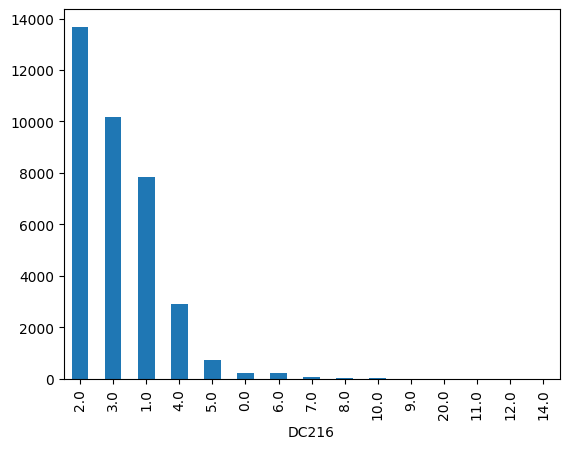

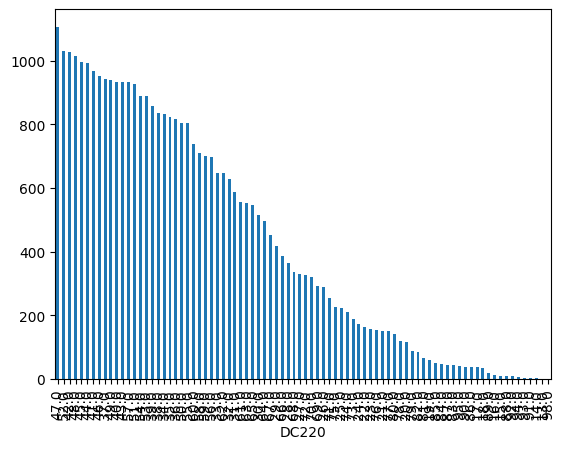

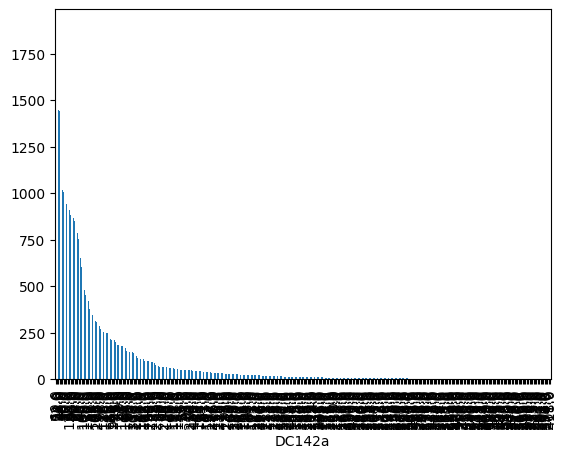

In [35]:
ALL_COLUMNS = CATEGORICAL_DATA + NUMERICAL_DATA

for column in ALL_COLUMNS:
    completed_dataset_mf[column].value_counts().plot(kind='bar')
    plt.show()

In [32]:
completed_dataset_mf.to_csv('mf_df_mapped.csv', index=False)